# Project on Trend Analysis and Visualization

In [1]:
#Hello Everyone
#This is Umang!
# I am going to explore this dataset, do trend analysis and visualization
#as a part of my Task in Internship with Happieloop

In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib. pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose

# Understanding Data

In [3]:
#Importing Electricity Production data, that we uploaded in our jupiter 
#notebook from Kaggle 
electric = pd.read_csv(r"C:\Users\umang\Desktop\Electric_Production.csv",
                       parse_dates=['DATE'])

In [4]:
electric

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [5]:
electric.columns

Index(['DATE', 'Value'], dtype='object')

In [6]:
# finding type of data
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    397 non-null    datetime64[ns]
 1   Value   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [7]:
# find null values
electric.isnull().sum()

DATE     0
Value    0
dtype: int64

In [8]:
electric['Value'].describe()

count    397.000000
mean      88.847218
std       15.387834
min       55.315100
25%       77.105200
50%       89.779500
75%      100.524400
max      129.404800
Name: Value, dtype: float64

In [9]:
# create a new column year
electric['Year'] = electric['DATE'].dt.year

In [10]:
# create a new column year
electric['Quarter'] = electric['DATE'].dt.quarter

In [11]:
# create a new column month
electric['Month']= electric['DATE'].dt.month

In [12]:
# create a new column of day of the week
electric['day']= electric['DATE'].dt.day

In [13]:
# create a new column of day of the week
electric['Weekday']= electric['DATE'].dt.weekday
# Monday is 0 and Sunday is 6

In [14]:
electric

,DATE,Value,Year,Quarter,Month,day,Weekday
0,1985-01-01,72.5052,1985,1,1,1,1
1,1985-02-01,70.6720,1985,1,2,1,4
2,1985-03-01,62.4502,1985,1,3,1,4
3,1985-04-01,57.4714,1985,2,4,1,0
4,1985-05-01,55.3151,1985,2,5,1,2
...,...,...,...,...,...,...,...
392,2017-09-01,98.6154,2017,3,9,1,4
393,2017-10-01,93.6137,2017,4,10,1,6
394,2017-11-01,97.3359,2017,4,11,1,2
395,2017-12-01,114.7212,2017,4,12,1,4


# Visualization

In [15]:
# Yearly average
# Calculate the average value for each year
Yearly_avg = electric.groupby('Year')['Value'].mean()
Yearly_avg

Year
1985     62.165667
1986     62.709892
1987     65.740275
1988     69.716358
1989     71.895167
1990     73.313433
1991     75.111850
1992     75.120908
1993     77.678992
1994     79.255058
1995     82.060867
1996     84.382417
1997     84.236192
1998     86.544075
1999     89.190892
2000     91.790125
2001     91.460792
2002     94.107075
2003     95.700108
2004     97.119225
2005     99.208242
2006     98.873225
2007    101.984167
2008    101.663992
2009     98.829783
2010    102.596883
2011    102.290475
2012     99.999992
2013    102.337350
2014    103.732783
2015    103.052908
2016    102.764375
2017    101.944842
2018    129.404800
Name: Value, dtype: float64

In [16]:
#Moving average
rolling_mean = electric['Value'].rolling(window=12).mean()
rolling_mean

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
392    101.234450
393    101.411700
394    101.782192
395    101.944842
396    103.157700
Name: Value, Length: 397, dtype: float64

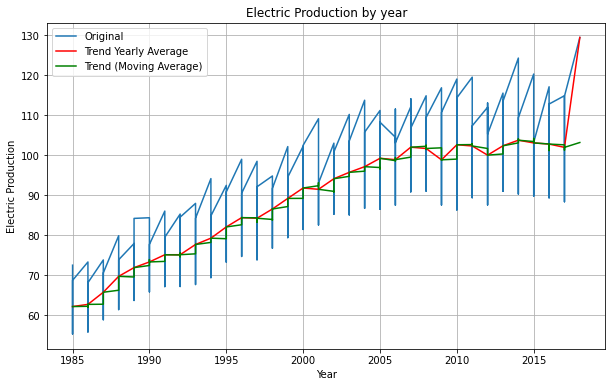

In [17]:
# Visualize the trend over time 
plt.figure(figsize=(10, 6))
plt.plot(electric['Year'], electric['Value'], label = 'Original')
plt.plot(Yearly_avg, color = 'red', label = 'Trend Yearly Average')
plt.plot(electric['Year'], rolling_mean, color='green', label='Trend (Moving Average)')
plt.plot()
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric Production by year')
plt.legend()
plt.grid()

In [18]:
#Quaterly
# plot quaterly value
quarterly_avg = electric.groupby('Quarter')['Value'].mean()
quarterly_avg

Quarter
1    94.773492
2    81.988264
3    92.199718
4    86.367535
Name: Value, dtype: float64

In [19]:
# seasonality
# Calculate the average value for each month across all years
monthly_avg = electric.groupby('Month')['Value'].mean()
monthly_avg

Month
1     102.100241
2      94.095521
3      87.902691
4      79.134518
5      79.414367
6      87.415906
7      94.944915
8      95.169848
9      86.484391
10     80.209121
11     83.135879
12     95.757606
Name: Value, dtype: float64

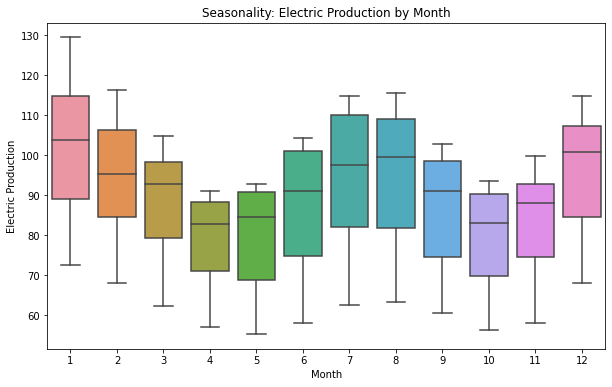

In [20]:
# Create a seasonal subseries plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=electric['Month'], y=electric['Value'])
plt.xlabel('Month')
plt.ylabel('Electric Production')
plt.title('Seasonality: Electric Production by Month')
plt.show()

In [21]:
# Whether more electricity on weekends
weekly_avg = electric.groupby('Weekday')['Value'].mean()
weekly_avg

Weekday
0    89.421589
1    88.732995
2    88.729811
3    89.373631
4    88.766464
5    88.681166
6    88.241842
Name: Value, dtype: float64

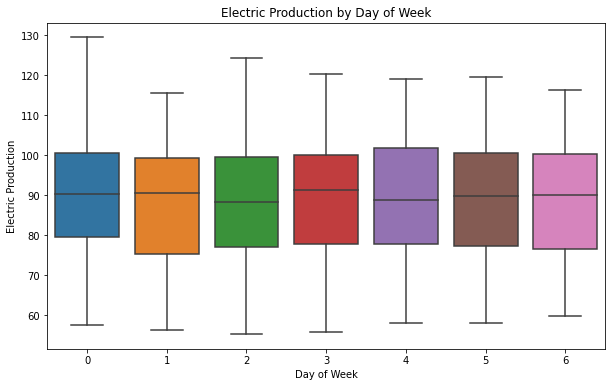

In [22]:
# Create a Weekday subseries plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=electric['Weekday'], y=electric['Value'])
plt.xlabel('Day of Week')
plt.ylabel('Electric Production')
plt.title('Electric Production by Day of Week')
plt.show()
#Here monday is 0 sunday is 6

In [23]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(electric['Value'], model='multiplicative', period = 30)

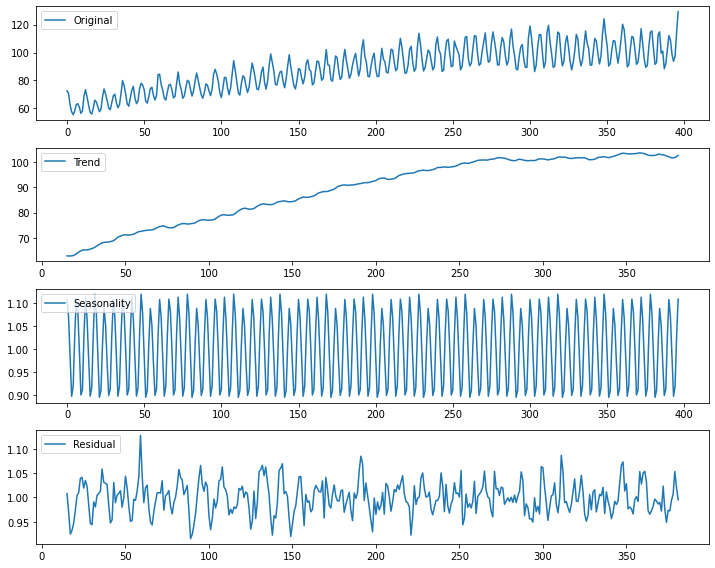

In [24]:
# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(electric['Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Documentation

In [25]:
# This dataset shows the date from 1985 till 2017 and the value of electricity
#produced. We find the general trends, seasonal variability, or any weekly 
#variability

In [26]:
# We conlude the following:
#1. Electricity production has definitely increased significantly from 60-70 
#in 1985 to 120-130 in 2017
#2. Season variability can be seen in the production of electricity, electricity 
#production is less in the months of March, April, May, September, October, 
#November. Higher value of electricity is produced during the months of
#January, February, December, June, July and August
#3. We do not see any significant variation in the electricity production between
#a weekend or a weekday